In [ ]:
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install fbprophet 
  !pip install hvplot
  !pip install holoviews
  !pip install yfinance
except:
  print("Error installing libraries")
finally:
  clear_output()
  print('Libraries successfully installed')


Libraries successfully installed


In [ ]:

import pandas as pd
import holoviews as hv
from fbprophet import Prophet
import hvplot.pandas
import datetime as dt
import yfinance as yf
%matplotlib inline

In [ ]:

tsla = yf.Ticker("TSLA")
# get stock info
tsla.info
# get historical market data
hist = tsla.history(period="max")

In [ ]:
tsla_df = pd.DataFrame(hist)
tsla_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2022-04-08,1043.209961,1048.439941,1022.440002,1025.489990,18293300,0,0.0
2022-04-11,980.400024,1008.469971,974.640015,975.929993,19785700,0,0.0
2022-04-12,997.640015,1021.190002,976.599976,986.950012,21992000,0,0.0


In [ ]:
tsla_df["Daily Returns"] = tsla_df["Close"].pct_change()
tsla_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Returns
Date,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0,NaN
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0,-0.002512
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0,-0.078472
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0,-0.125683
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0,-0.160938
...,...,...,...,...,...,...,...,...
2022-04-08,1043.209961,1048.439941,1022.440002,1025.489990,18293300,0,0.0,-0.030049
2022-04-11,980.400024,1008.469971,974.640015,975.929993,19785700,0,0.0,-0.048328
2022-04-12,997.640015,1021.190002,976.599976,986.950012,21992000,0,0.0,0.011292


In [ ]:
tsla_dub = tsla_df.loc["2020-01-01":,["Close","Daily Returns"]]
tsla_dub

,Close,Daily Returns
Date,,
2020-01-02,86.052002,0.028518
2020-01-03,88.601997,0.029633
2020-01-06,90.307999,0.019255
2020-01-07,93.811996,0.038801
2020-01-08,98.428001,0.049205
...,...,...
2022-04-08,1025.489990,-0.030049
2022-04-11,975.929993,-0.048328
2022-04-12,986.950012,0.011292


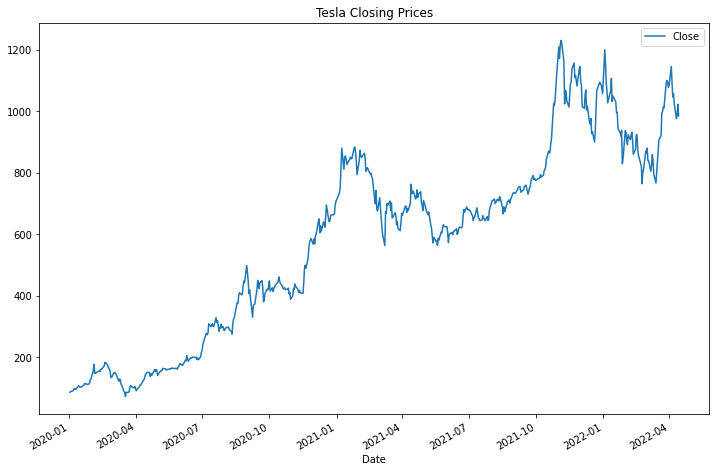

In [ ]:
tsla_dub[["Close"]].plot(figsize=(12, 8), title="Tesla Closing Prices")

In [ ]:
import statsmodels.api as sm
ts_noise, ts_trend = sm.tsa.filters.hpfilter(tsla_dub["Close"])

In [ ]:
tsla_df = tsla_dub[["Close"]].copy()
tsla_df["noise"] = ts_noise
tsla_df["trend"] = ts_trend
tsla_df

,Close,noise,trend
Date,,,
2020-01-02,86.052002,2.176098,83.875904
2020-01-03,88.601997,2.309192,86.292806
2020-01-06,90.307999,1.596932,88.711067
2020-01-07,93.811996,2.678505,91.133492
2020-01-08,98.428001,4.864120,93.563881
...,...,...,...
2022-04-08,1025.489990,-24.525963,1050.015953
2022-04-11,975.929993,-76.146112,1052.076104
2022-04-12,986.950012,-66.967171,1053.917183


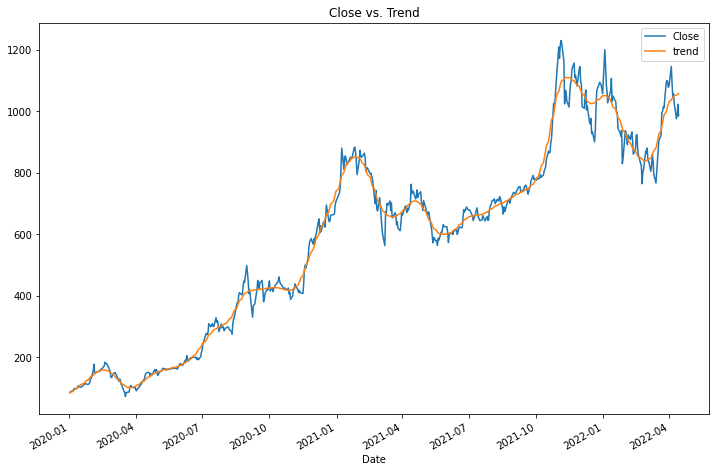

In [ ]:

tsla_df[["Close", "trend"]]["2020-01-01":].plot(figsize=(12, 8), title="Close vs. Trend")

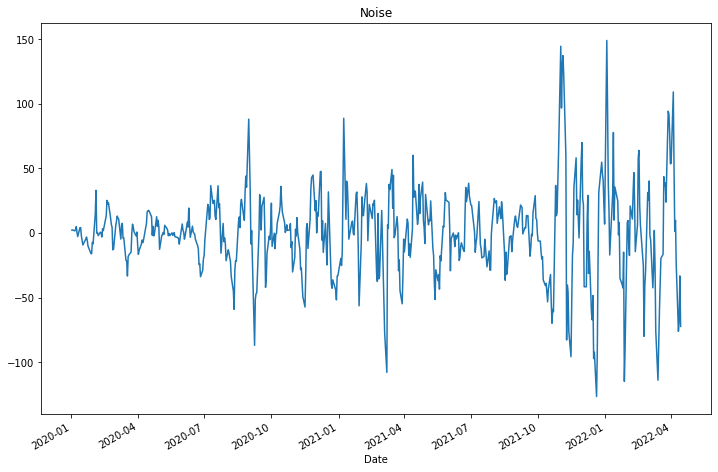

In [ ]:
ts_noise.plot(figsize=(12,8), title="Noise")

In [ ]:
import numpy 

In [ ]:
returns = (tsla_df[["Close"]].pct_change() * 100)
returns = returns.replace(-numpy.nan, numpy.nan).dropna()
returns

,Close
Date,
2020-01-03,2.963319
2020-01-06,1.925466
2020-01-07,3.880053
2020-01-08,4.920485
2020-01-09,-2.194501
...,...
2022-04-08,-3.004939
2022-04-11,-4.832811
2022-04-12,1.129181


In [ ]:
import statsmodels.api as sm
model = sm.tsa.ARMA(returns, order=(2, 1))

outcome = model.fit()

In [ ]:
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                  576
Model:                     ARMA(2, 1)   Log Likelihood               -1700.978
Method:                       css-mle   S.D. of innovations              4.637
Date:                Sat, 16 Apr 2022   AIC                           3411.955
Time:                        14:43:24   BIC                           3433.736
Sample:                             0   HQIC                          3420.449
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5319      0.205      2.590      0.010       0.129       0.934
ar.L1.Close     0.4238      0.445      0.953      0.341      -0.448       1.295
ar.L2.Close     0.0334      0.042      0.785      0.433      -0.050       0.117
ma.L1.Close    -0.4230      0.443     -0.954      0.340      -1.292       0.446
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0340           +0.0000j            2.0340            0.0000
AR.2          -14.7388           +0.0000j           14.7388            0.5000
MA.1            2.3641           +0.0000j            2.3641            0.0000
-----------------------------------------------------------------------------
"""

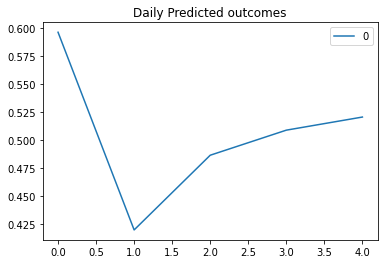

In [ ]:
pd.DataFrame(outcome.forecast(steps=5)[0]).plot(title="Daily Predicted outcomes")

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
model = ARIMA(tsla_dub[["Close"]], order=(5, 1, 1))

# Fit the model
outcome = model.fit()

In [ ]:
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  576
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -2689.828
Method:                       css-mle   S.D. of innovations             25.813
Date:                Sat, 16 Apr 2022   AIC                           5395.655
Time:                        14:43:25   BIC                           5430.504
Sample:                             1   HQIC                          5409.246
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5566      1.110      1.402      0.161      -0.619       3.732
ar.L1.D.Close    -0.7704      0.142     -5.426      0.000      -1.049      -0.492
ar.L2.D.Close    -0.0471      0.053     -0.897      0.370      -0.150       0.056
ar.L3.D.Close     0.0008      0.053      0.015      0.988      -0.103       0.104
ar.L4.D.Close     0.0469      0.053      0.891      0.373      -0.056       0.150
ar.L5.D.Close     0.0674      0.042      1.590      0.112      -0.016       0.151
ma.L1.D.Close     0.7579      0.137      5.542      0.000       0.490       1.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9678           -0.0000j            1.9678           -0.0000
AR.2            0.0741           -1.8800j            1.8815           -0.2437
AR.3            0.0741           +1.8800j            1.8815            0.2437
AR.4           -1.4059           -0.3911j            1.4593           -0.4568
AR.5           -1.4059           +0.3911j            1.4593            0.4568
MA.1           -1.3195           +0.0000j            1.3195            0.5000
-----------------------------------------------------------------------------
"""

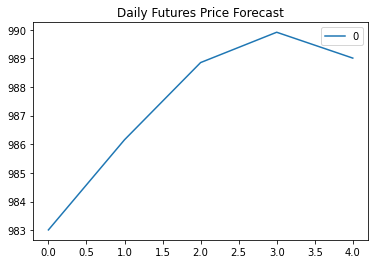

In [ ]:
pd.DataFrame(outcome.forecast(steps=5)[0]).plot(title="Daily Futures Price Forecast")

In [ ]:
import arch 

model = arch.arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

outcome = model.fit()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1657.6204010473707
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1657.3412352388154
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1657.3394609706147
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1657.3312666921174
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1657.1847573400992
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1657.0894801893824
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1657.0826352340364
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1657.079926205654
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1657.0782164350724
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1657.0781937236875
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1657.0781926084105
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1657.0781926084046
            Iterations: 11
            Function evaluations: 77
            Gradient eva

In [ ]:
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -1657.08
Distribution:                  Normal   AIC:                           3322.16
Method:            Maximum Likelihood   BIC:                           3339.58
                                        No. Observations:                  576
Date:                Sat, Apr 16 2022   Df Residuals:                      576
Time:                        14:45:56   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5087      0.720      0.706      0.480    [ -0.903,  1.921]
alpha[1]       0.0879  5.629e-02      1.562      0.118 [-2.243e-02,  0.198]
alpha[2]       0.0228  9.495e-02      0.241      0.810    [ -0.163,  0.209]
beta[1]        0.8707  9.727e-02      8.951  3.514e-19    [  0.680,  1.061]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2022-04-14'

In [ ]:
forecast_horizon = 5

forecasts = outcome.forecast(start=last_day, horizon=forecast_horizon)

intermediate = numpy.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

In [ ]:
final = intermediate.dropna().T
final.head()

Date,2022-04-14
h.1,61.534591
h.2,61.925471
h.3,62.374723
h.4,62.811125
h.5,63.236707


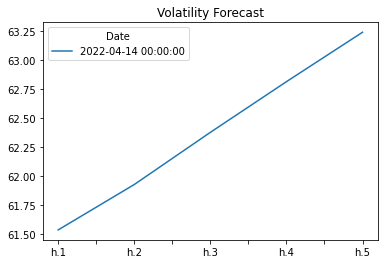

In [ ]:
final.plot(title="Volatility Forecast")